# Сборный проект №2 HR - аналитика
 
---

HR-аналитики компании ***«Работа с заботой»*** помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — **уровень удовлетворённости сотрудника** работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1:

>  **0** — **совершенно неудовлетворён**

>  **1** — **полностью удовлетворён**

---

# Задача


> **Задача №1.** Построить модель, которая сможет **предсказать уровень удовлетворённости сотрудника** на основе данных заказчика

Удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник

> **Задача №2.** Построить модель, которая сможет на основе данных заказчика **предсказать** то, что **сотрудник уволится из компании**

---

# План работ

> **Задача №1**

- [Шаг 1. Загрузка данных](#section_1)

- [Шаг 2. Предобработка данных](#section_2)

- [Шаг 3. Исследовательский анализ данных](#section_3)

- [Шаг 4. Подготовка данных](#section_4)

- [Шаг 5. Обучение модели](#section_5)

- [Шаг 6. Вывод к задаче №1](#section_6)

---

> **Задача №2**

- [Шаг 1. Загрузка данных](#section_7)

- [Шаг 2. Предобработка данных](#section_8)

- [Шаг 3. Исследовательский анализ данных](#section_9)

- [Шаг 4. Добавление нового входного признака](#section_10)

- [Шаг 5. Подготовка данных](#section_11)

- [Шаг 6. Обучение модели](#section_12)

- [Шаг 7. Вывод к задаче №2](#section_13)

- [Шаг 8. Общий вывод](#section_14)

---

<a id='section_1'></a>

## Задача №1

### Загрузка данных

In [1]:
#Установка библиотек:
!pip install -U scikit-learn
!pip install phik

     |████████████████████████████████| 13.4 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 65.2 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
     |████████████████████████████████| 686 kB 2.2 MB/s eta 0:00:01


In [2]:
#Импорт библиотек:

#Библиотеки для работы с табличными данными и массивами:
import pandas as pd

import numpy as np

#Библиотеки для графической иллюстрации:
import matplotlib.pyplot as plt

import seaborn as sns

#Инструменты для создания пайплайнов:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Библиотеки для масштабирования и кодирования данных:
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler,
    FunctionTransformer)

#Класс для работы с пропусками
from sklearn.impute import SimpleImputer

#Модели МО:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression

#Метрики:
from sklearn.metrics import make_scorer, roc_auc_score

#Библиотеки для создания выборок:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#Библиотеки для корреляционного анализа:
import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix

import warnings

In [3]:
#Считываем и распаковываем исходные данные, представленные в формате CSV:
#Считываем с сети:
try:
    #Тренировочная выборка:
     df_train = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
    
    #Входные признаки тестовой выборки:
     df_test_features = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    
    #Целевой признак тестовой выборки:
     df_test_target = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')
        
#В случае изменения ссылки или отсутсвия сети:
except:
     df_train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    
     df_test_features = pd.read_csv('/datasets/test_features.csv')
    
     df_test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
        
#Используем специальную команду отображения таблиц, для наглядного просмотра всех данных:    
pd.set_option('display.max_columns', None)

In [4]:
#Создадим список, в который положим все исходные датафреймы:
all_df = [df_train, df_test_features, df_test_target]

#С помощью цикла просмотрим все данные о каждой таблице:
for df in all_df:    
    display(df.head(10))
    print()
    df.info()
    print()
    print('-'*125)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB

-----------------------------------------------------------------------------------------------------------------------------


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB

-----------------------------------------------------------------------------------------------------------------------------


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
5,817219,0.76
6,269033,0.64
7,962356,0.38
8,649052,0.14
9,532834,0.59



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB

-----------------------------------------------------------------------------------------------------------------------------


Итак, проанализируем три файла (формата ***csv***), которые мы выгрузили:

---

> ***df_train*** - **Тренировочная выборка** | Размер таблицы: строк **4000** |  столбцов **10**

> ***df_test_features*** - Входные признаки **тестовой выборки** | Размер таблицы: строк **2000** |  столбцов **9**

> ***df_test_target*** - Целевой признак **тестовой выборки** | Размер таблицы: строк **2000** |  столбцов **2**

---

- По предварительному осмотру таблиц можно сказать, что **все типы данных соответсвуют всем значениям типов в столбцах**

- В первых двух таблицах имеются пропуска в столбцах ***dept*** и ***level***

- Количество строк в таблицах для тестовой выборки - **совпадает**

- Имена столбцов всех таблиц - **корректны**

<a id='section_2'></a>

### Предобработка данных

In [5]:
#Создадим функцию для просмотра уникальных категориальных значений по всем столбцам исходных датафреймов:
def uniq(all_data):
    k = 1
    for name in all_data:
        for col in name:
            if type(name[col].values[0]) == str:
                print(f'Датафрейм №{k}')
                print(f'Имя столбца: {col}')
                print(name[col].unique())
                print()
        k+=1
        pass
    
#Вызовем функцию:
uniq(all_df)

Датафрейм №1
Имя столбца: dept
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]

Датафрейм №1
Имя столбца: level
['junior' 'middle' 'sinior' nan]

Датафрейм №1
Имя столбца: workload
['medium' 'high' 'low']

Датафрейм №1
Имя столбца: last_year_promo
['no' 'yes']

Датафрейм №1
Имя столбца: last_year_violations
['no' 'yes']

Датафрейм №2
Имя столбца: dept
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']

Датафрейм №2
Имя столбца: level
['junior' 'middle' 'sinior' nan]

Датафрейм №2
Имя столбца: workload
['medium' 'low' 'high' ' ']

Датафрейм №2
Имя столбца: last_year_promo
['no' 'yes']

Датафрейм №2
Имя столбца: last_year_violations
['no' 'yes']



1. В таблицах **имеются пропуска** (значения ***nan***) - их обработкой займемся при создании пайплайна


2. Все категориальные значения в столбцах - **корректны** (не имеют орфографических ошибок)


3. Заменим ***sinior*** на значение ***senior***


4. В Датафрейме №2 в столбцах ***dept*** и ***workload*** имеются значения ввиде пустых строк, просмотрим данные значения внимательнее и постараемся их вылечить

In [6]:
#Определим локацию и количество элементов с пустыми строками в столбце dept:
df_test_features.loc[df_test_features['dept'] == ' ']

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1699,822186,,middle,medium,3,no,no,4,38400


In [7]:
#Определим локацию и количество элементов с пустыми строками в столбце workload:
df_test_features.loc[df_test_features['workload'] == ' ']

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,,4,no,no,4,28800


In [8]:
#Значения с пустыми строками в каждом столбце заменим модами:
#df_test_features['dept'] = df_test_features['dept'].replace(' ', df_test_features['dept'].mode()[0])

#df_test_features['workload'] = df_test_features['workload'].replace(' ', df_test_features['workload'].mode()[0])

#Заменим значения sinior:
df_train['level'] = df_train['level'].replace('sinior', 'senior')

df_test_features['level'] = df_test_features['level'].replace('sinior', 'senior')

#Вызовем снова функцию uniq(), сделаем визуальную проверку значений:
uniq(all_df)

Датафрейм №1
Имя столбца: dept
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]

Датафрейм №1
Имя столбца: level
['junior' 'middle' 'senior' nan]

Датафрейм №1
Имя столбца: workload
['medium' 'high' 'low']

Датафрейм №1
Имя столбца: last_year_promo
['no' 'yes']

Датафрейм №1
Имя столбца: last_year_violations
['no' 'yes']

Датафрейм №2
Имя столбца: dept
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']

Датафрейм №2
Имя столбца: level
['junior' 'middle' 'senior' nan]

Датафрейм №2
Имя столбца: workload
['medium' 'low' 'high' ' ']

Датафрейм №2
Имя столбца: last_year_promo
['no' 'yes']

Датафрейм №2
Имя столбца: last_year_violations
['no' 'yes']



> Проверим датафреймы на наличие **явных дубликатов**

In [9]:
#Проверка:
for df in all_df:
    print(df.duplicated().sum())
    print()

0

0

0



После проведенной предобработки данных, можно сделать следующие выводы:

> явных дубликатов - **не выявлено**

> Орфографических ошибок в значениях категориальных переменных - **не найдено**

> Найдены **значения с пустыми строками** - изменены на значения **моды** по данным столбцам

<a id='section_3'></a>

### Исследовательский анализ данных

#### Анализ df_train

Рассмотрим в начале все **количественные переменные**:


Статистические характеристики признака employment_years


count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

Мода признака employment_years: 1



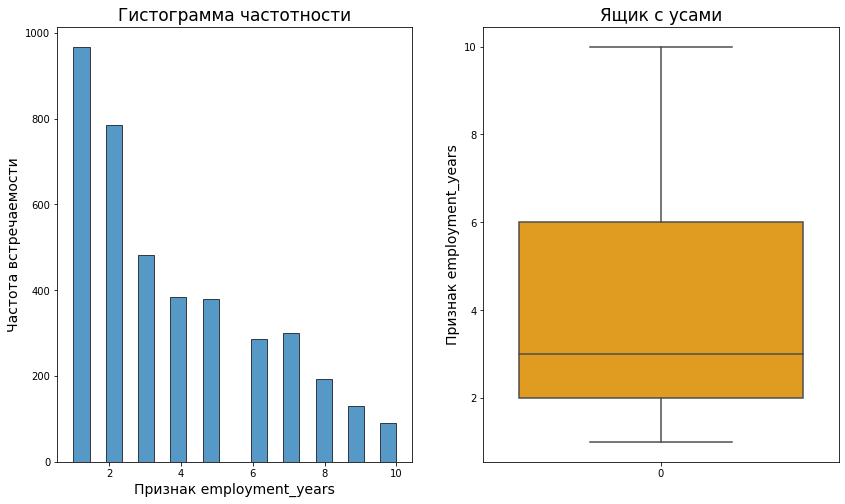


Статистические характеристики признака supervisor_evaluation


count    4000.000000
mean        3.476500
std         1.008812
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64

Мода признака supervisor_evaluation: 4



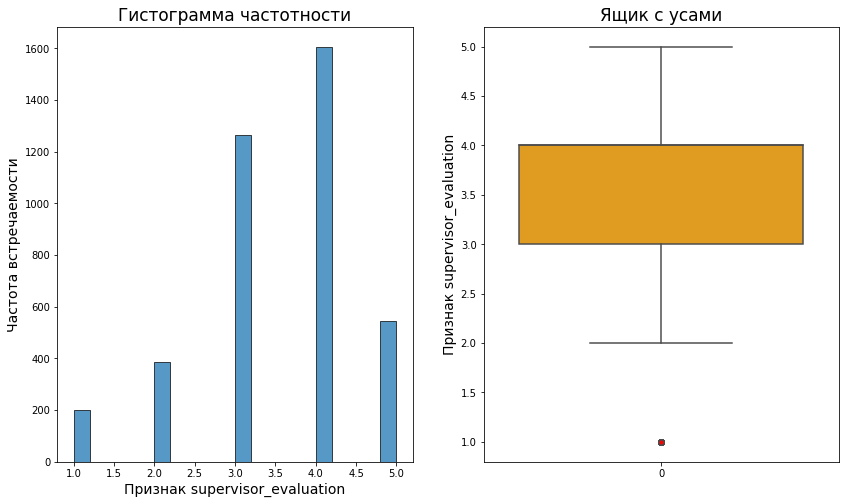


Статистические характеристики признака salary


count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64

Мода признака salary: 24000



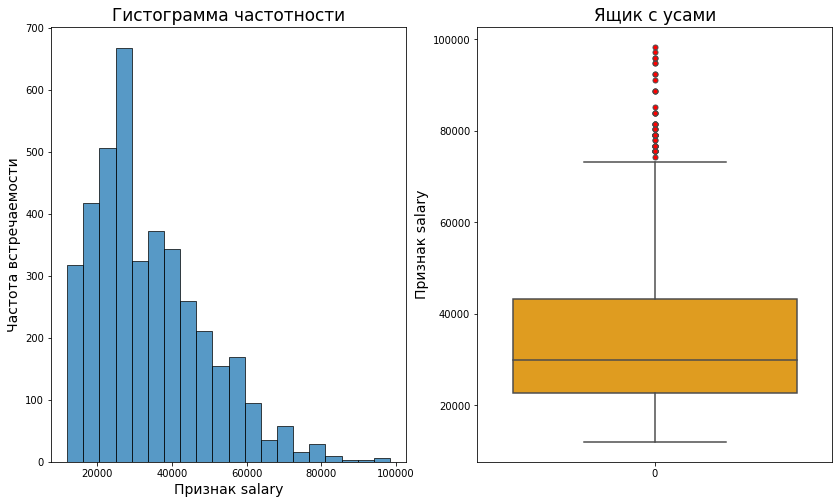


Статистические характеристики признака job_satisfaction_rate


count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

Мода признака job_satisfaction_rate: 0.65



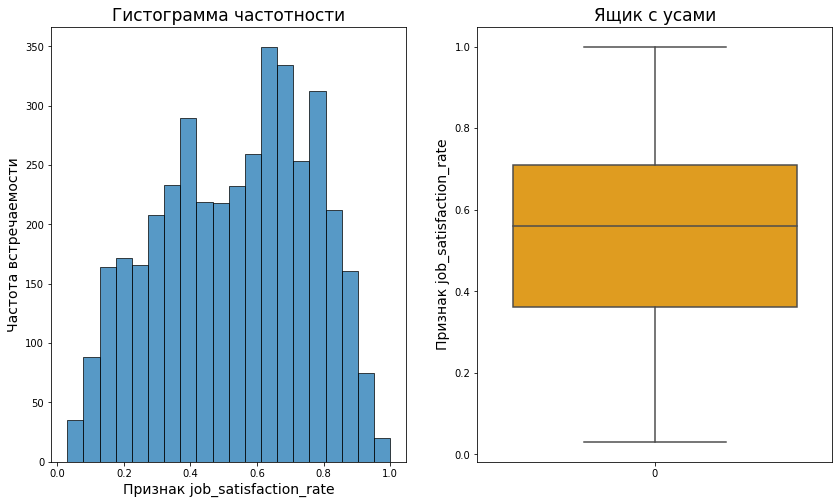

In [10]:
#Создадим функцию для построения частотных гистограмм и боксплотов:
def graph_num(df, bins):
    
    #Перебираем все имена с количественными столбцами без учета id:
    for name in df.select_dtypes(include='number').columns.tolist()[1:]:
        
        #Статистические характеристики по столбцу:
        print()
        print(f'Статистические характеристики признака {name}')
        display(df[name].describe())        
        print(f'Мода признака {name}: {df[name].mode()[0]}')
        print()
            
        #Строим гистограммы в цикле:
        fig, axes = plt.subplots(1, 2, figsize=(14,8))        
        sns.histplot(data=df[name], linewidth=0.7, bins=bins, ax=axes[0])        
        axes[0].set_title('Гистограмма частотности', fontsize=17)
        axes[0].set_xlabel(f'Признак {name}', fontsize=14)
        axes[0].set_ylabel('Частота встречаемости', fontsize=14)        
       
        #Строим боксплоты в цикле:       
        sns.boxplot(data=df[name], color='orange', flierprops=dict(marker='o', markerfacecolor='red', markersize=5), ax=axes[1])
        axes[1].set_title('Ящик с усами', fontsize=17)
        axes[1].set_ylabel(f'Признак {name}', fontsize=14)
        plt.show()        
        
        
#Вызовем функцию для первого датафрейма: (количество корзин можно менять, если потребуется)
graph_num(df_train, 20)

> Все количественные признаки лежат в интервале допустимых значений

> **Аномальные значения** в таблице - **не наблюдаются**

> Исходя из **"ящиков с усами"** имеются **выбросы** - удалять мы их не будем, т.к. данные значения являются нормальными в рамках нашей задачи. **Пример:** прибыль сотрудника может достигать **100 тысяч рублей** - но по ***boxplot*** данное знаечние является выбросом в столбце ***salary***

Теперь рассмотрим категориальные значения таблицы ***df_train***:

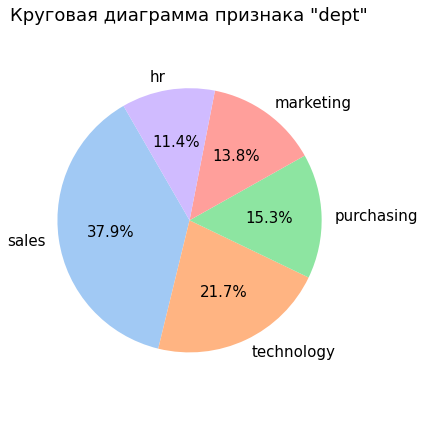

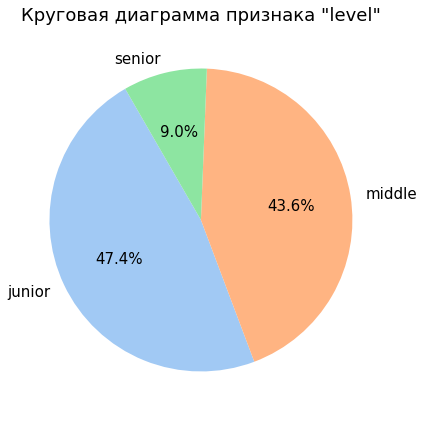

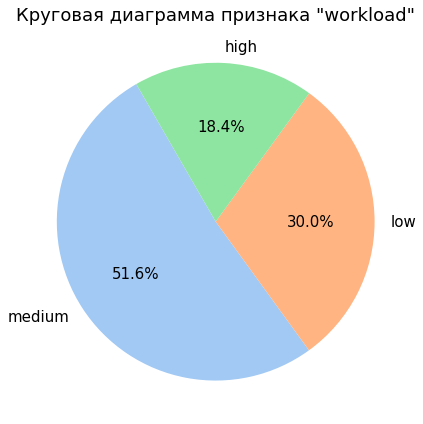

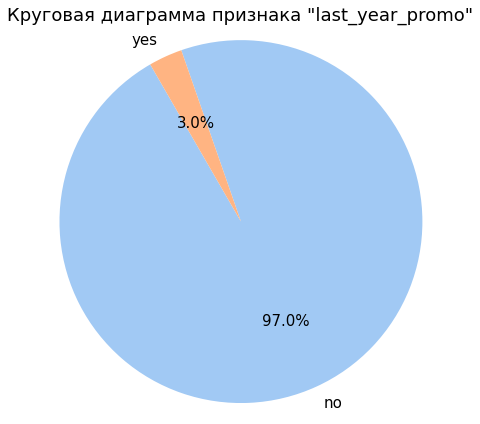

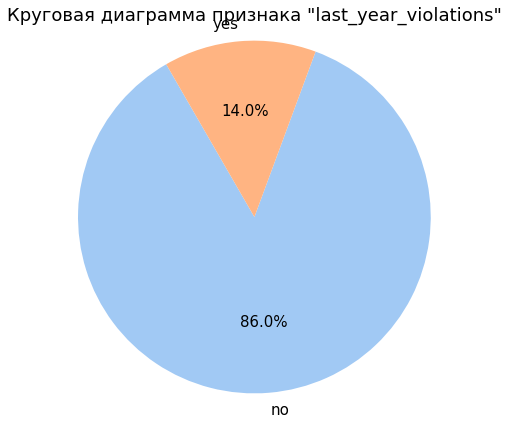

In [11]:
#Создадим функцию для построения круговых диаграмм, чтобы оценить соотношение категориальных признаков:
def graph_cat(df):
    
    #Перебираем имена категориальных переменных в цикле:
    for name in df.select_dtypes(include='object').columns.tolist():
        
        #Задаем цветовую палитру только для текущей функции:
        with sns.axes_style("whitegrid"):
            colors = sns.color_palette("pastel")
        
        #Строим круговые диаграммы:
        df[name].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%', colors=colors, startangle=120, fontsize=15)
        plt.ylabel('')
        plt.title(f'Круговая диаграмма признака "{name}"', size=18)
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
        print()

#Вызовем функцию:        
graph_cat(df_train)

На круговых диаграммах можно увидить в каком соотношении делятся значения по конктретным признакам:

> Можно отметить слишком **маленький процент повышений** за последний год в признаке ***last_year_promo***, он состовляет всего **3%**

#### Анализ df_test_features

Рассмотрим как ведут себя количественные данные в дв ***df_test_features***:


Статистические характеристики признака employment_years


count    2000.000000
mean        3.666500
std         2.537222
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

Мода признака employment_years: 1



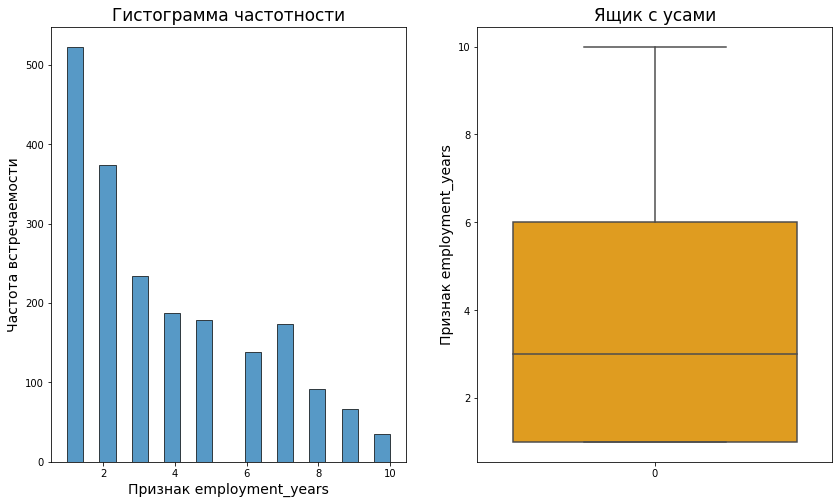


Статистические характеристики признака supervisor_evaluation


count    2000.000000
mean        3.526500
std         0.996892
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64

Мода признака supervisor_evaluation: 4



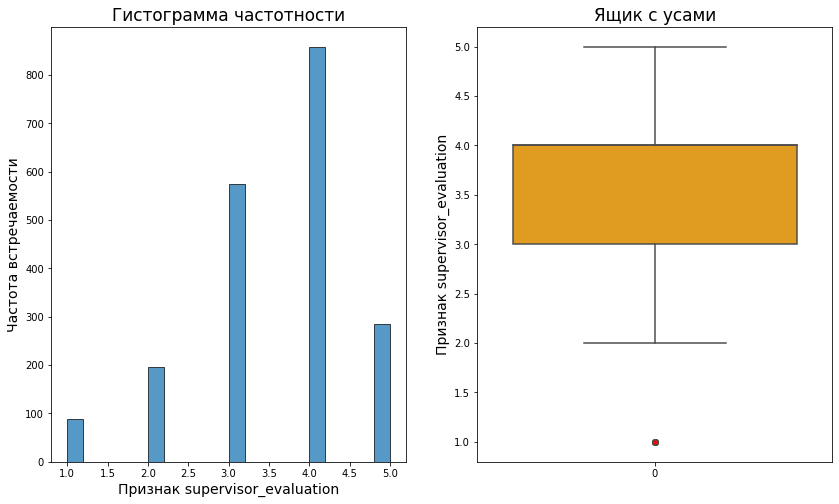


Статистические характеристики признака salary


count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

Мода признака salary: 27600



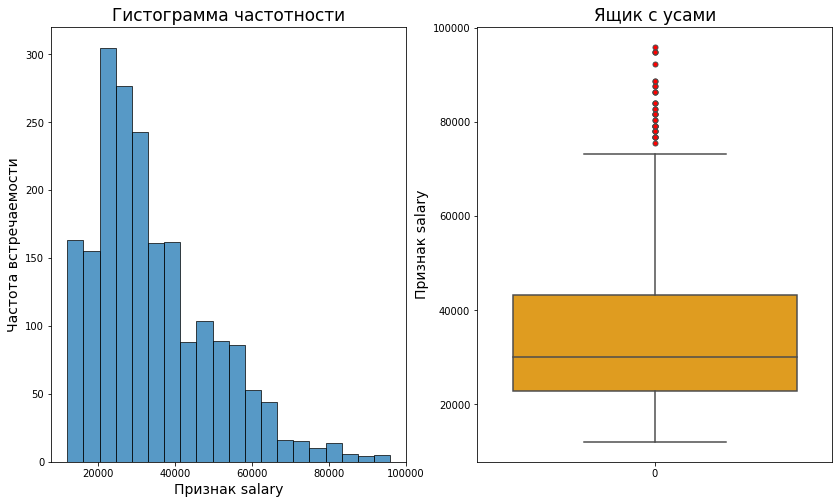

In [12]:
#Вызовем функцию для дф df_test_features:
graph_num(df_test_features, 20)

Аналогичные выводы по тестовой выборке:

> Данные лежат в допустимом диапозоне

> Аномальных значений - **нет**

> Есть выбросы - удалять их не будем

Также можно отметить по двум таблицам, что в комании слишком большое количество **новых специалистов**

Рассмотрим категориальные переменные ***df_test_features***:

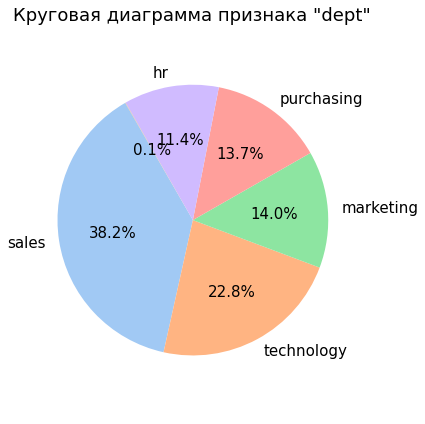

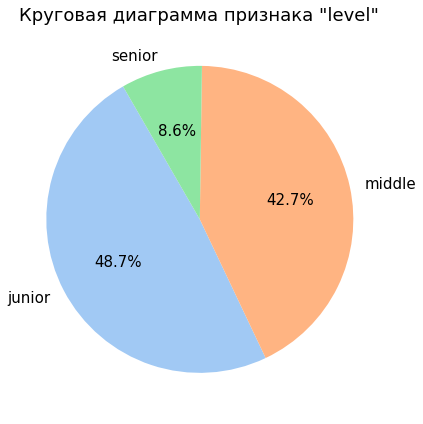

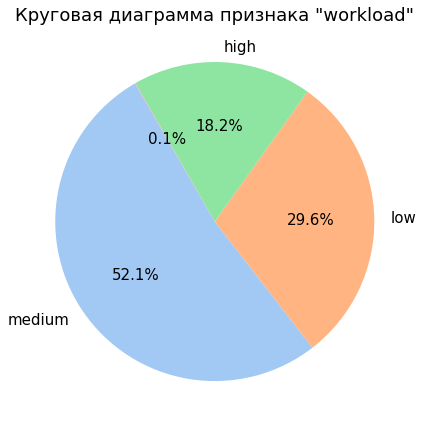

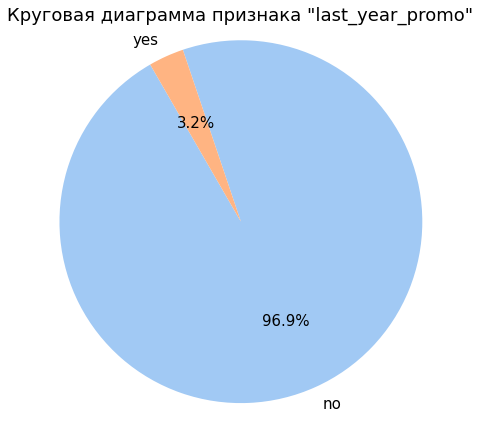

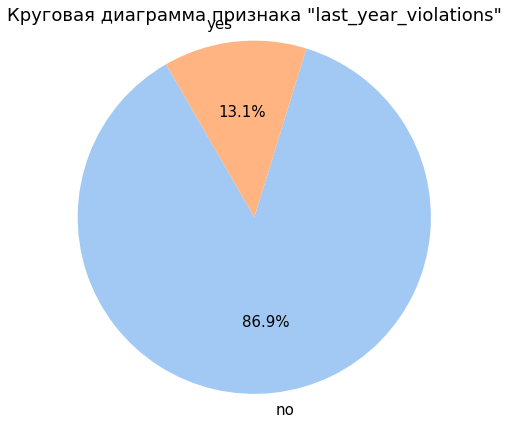

In [13]:
#Вызываем функцию:
graph_cat(df_test_features)

> В столбце ***last_year_promo*** (количество повышений за последний год) также как и в тренеровочной выборке - слишком маленький процен повышений, равный **3,2%**

#### Анализ df_test_target


Статистические характеристики признака job_satisfaction_rate


count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64

Мода признака job_satisfaction_rate: 0.7



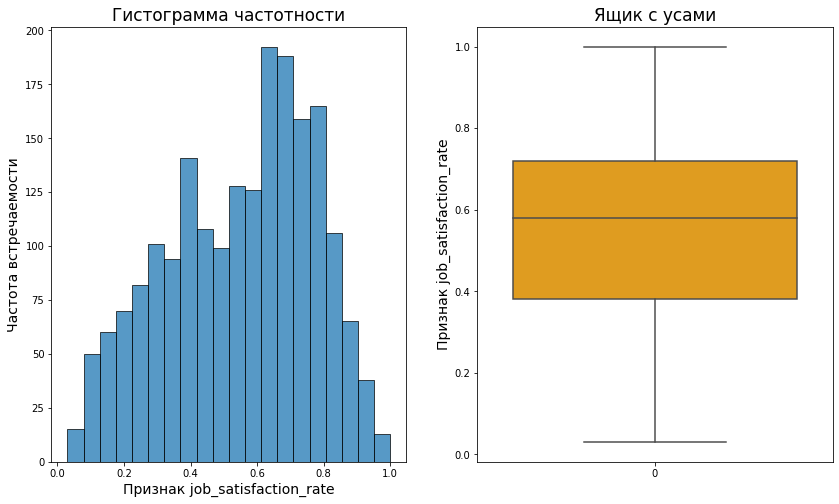

In [14]:
#Вызываем функцию:
graph_num(df_test_target, 20)

Итак, в последней таблице всего 1 признак (целевой), распределение схоже с **нормальным**, выбросов - **не наблюдается**, аномалий - **нет**, данные лежат в допустимом диапозоне.

### Корреляционный анализ

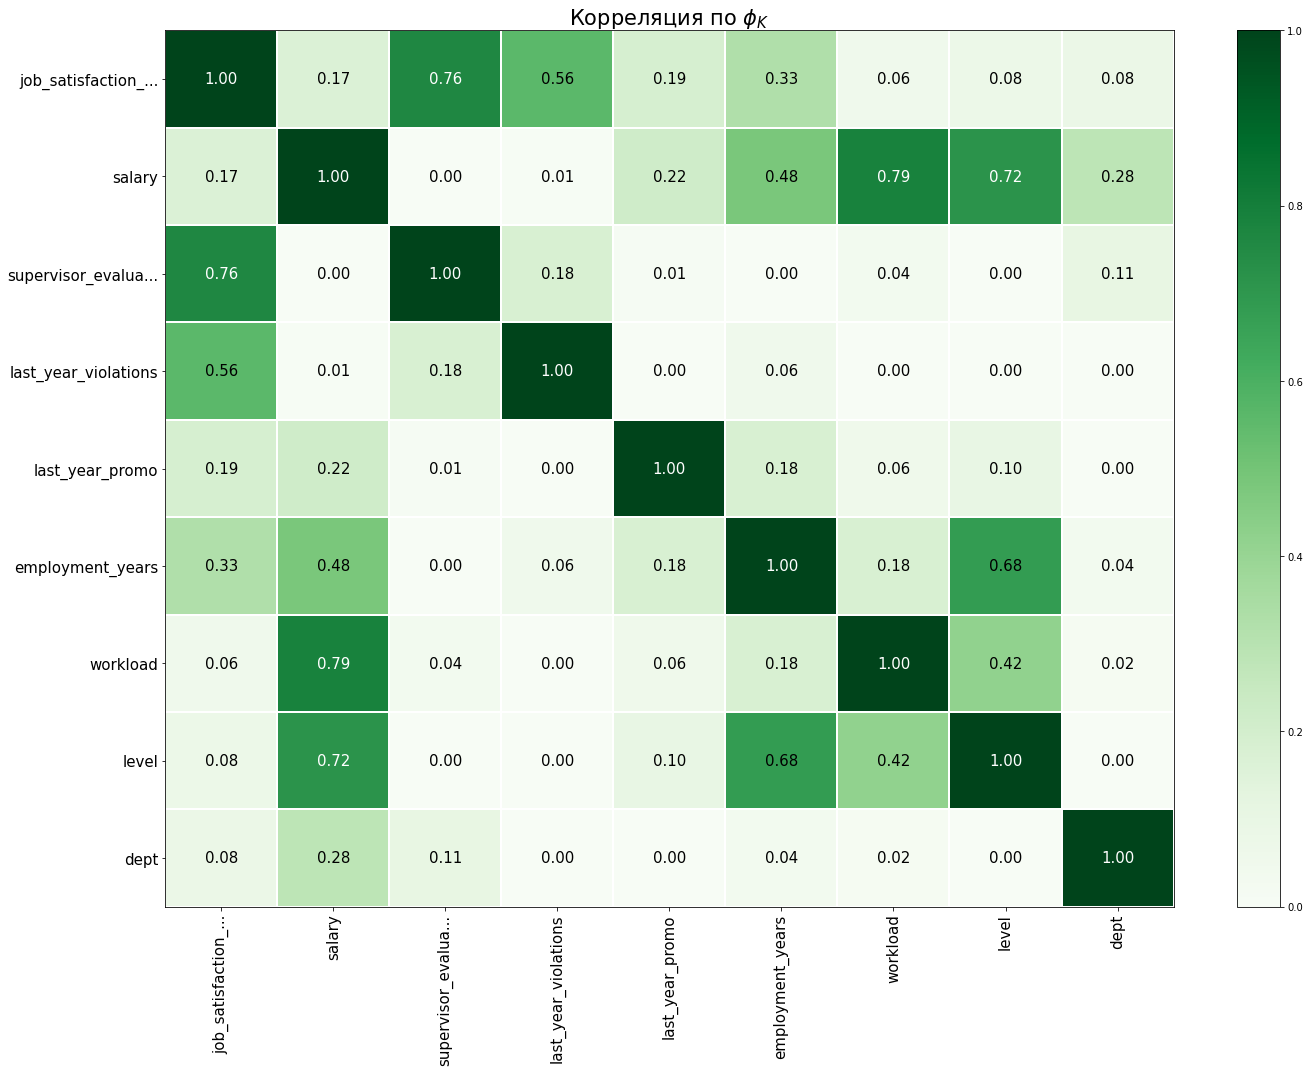

In [15]:
#Рассмотрим корреляцию входных признаков на тренеровочной выборке:

#Создаем список непрерывных переменных:
interval_cols = ['employment_years', 'salary', 'job_satisfaction_rate']

#Считаем корреляции данных:
phik_overview = phik_matrix(df_train.drop('id', axis=1), interval_cols=interval_cols)

#Строим матрицу корреляции Phik:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция по $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

Как видно из матрицы корреляции ***Phik*** - **мультиколлинеарности** не наблюдается между входными признаками и целевым (***job_satisfaction_rate***)

<a id='section_4'></a>

### Подготовка данных

Создадим пайплайн, в котором будут устранены пропуска, а данные будут отмасштабированны и кодированы:

In [16]:
#Создадим списпики для кодирования и масштабирования:

#Список для кодирования с помощью OneHotEncoder:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']

#Список для кодирования с помощью OrdinalEncoder:
ord_columns = ['level', 'workload']

#Список для кодирования количественных перменных:
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

#Трансформер для замены пустых строк на np.nan
replace_empty_strings = FunctionTransformer(lambda x: x.replace(' ', np.nan))

#Создадим паплайн предподготовки данных:

#replace_empty + SimpleImputer + OHE:
ohe_pipe = Pipeline(
    [
#         (
#             'replace_empty', 
#             replace_empty_strings
#         ),
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
 )

#Cоздаём пайплайн для подготовки признаков из списка ord_columns:
#replace_empty + SimpleImputer + Ord + SimpleImputer:
ord_pipe = Pipeline(
    [
#         (
#             'replace_empty', 
#             replace_empty_strings
#         ),
        (
            'simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  OrdinalEncoder(categories=[['junior', 'middle', 'senior'], 
                                               ['low', 'medium', 'high']], 
                                   handle_unknown='use_encoded_value', unknown_value=np.nan)
        ),
        (
            'simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

#Создаем общий пайплайн для подготовки данных:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)    
    ], 
    remainder =  'passthrough'
)

data_preprocessor

#Создаем финальный пайплайн, в котором будем перебирать методы масштабирования и различные модели:

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression())
    ]
)

#Вызовем финальный пайплайн и посмотрим что получилось:
pipe_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'senior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary'])])),
                ('models', LinearRegression())])

<a id='section_5'></a>

### Обучение моделей

In [17]:
#Задаем константы
RANDOM_STATE = 42

#Тренеровочные выборки:
X_train = df_train.drop(['id', 'job_satisfaction_rate'], axis=1)
y_train = df_train['job_satisfaction_rate']

#Отсортируем значения по id, чтобы избежать разброса:
df_test_features = df_test_features.sort_values(by='id')
df_test_target = df_test_target.sort_values(by='id')

#Тестовые выборки:
X_test = df_test_features.drop('id', axis=1)
y_test = df_test_target['job_satisfaction_rate']

> Для оценки работы моделей создадим собственную функцию, с помощью которой будет производиться оценка:

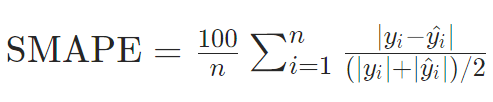

> **SMAPE** (англ. *symmetric mean absolute percentage error*, «симметричное среднее абсолютное процентное отклонение»)

Реализуем данную метрику с помощью функции:

In [18]:
#Фунция для создания собственной метрики:
def smape(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    scale = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(error / scale) * 100

scorer = make_scorer(smape, greater_is_better=False)

#### Модель линейной регрессии

In [19]:
#Перебор методов масштабирования и гиперпараметров: 
param_distributions = [  
    {'models': [LinearRegression()],
     'models__fit_intercept': [True, False],     
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}]

#Поиск гиперпараметров:
    
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions, 
    cv=5,
    random_state=RANDOM_STATE,    
    n_iter=6,
    scoring=scorer,
    n_jobs=-1
)

#Обучаем модель:
randomized_search.fit(X_train, y_train)

#Выводим метрику лучшей модели:
print('Метрика SMAPE лучшей модели:', abs(randomized_search.best_score_))

#Выведем параметры лучшей модели:
randomized_search.best_params_

Метрика SMAPE лучшей модели: 24.562117175312192


{'preprocessor__num': 'passthrough',
 'models__fit_intercept': False,
 'models': LinearRegression()}

<font color='purple'><b>Комментарий студента</b></font>

Добавил `scoring=scorer` при поиске гиперапарметров, чтобы рассчитать метрику SMAPE для лучшей модели. Вывел эту метрику по средствам `randomized_search.best_score_`

In [20]:
#Расчитываем метрику SMAPE на тестовых данных для контроля переобучения:
y_pred = randomized_search.predict(X_test)

#Используем функцию и смотрим какие результаты дала метрика SMAPE:
smape(y_test, y_pred)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


23.666891357053693

#### Модель Дерева решений

In [21]:
#Перебор методов масштабирования и гиперпараметров: 
param_distributions = [  
    {'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
     'models__max_depth': range(1,20),
     'models__min_samples_split': range(2,20),
     'models__min_samples_leaf': range(2,20),     
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}]

#Поиск гиперпараметров:
    
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions, 
    cv=5,    
    random_state=RANDOM_STATE,
    scoring=scorer,
    n_jobs=-1
)

#Обучаем модель:
randomized_search.fit(X_train, y_train)

#Выводим параметры лучшей модели:
print('Метрика SMAPE лучшей модели:', abs(randomized_search.best_score_))

#Выведем параметры лучшей модели:
randomized_search.best_params_

Метрика SMAPE лучшей модели: 14.907768015637316


{'preprocessor__num': StandardScaler(),
 'models__min_samples_split': 11,
 'models__min_samples_leaf': 6,
 'models__max_depth': 17,
 'models': DecisionTreeRegressor(random_state=42)}

In [22]:
#Расчитываем метрику SMAPE на тестовых данных для контроля переобучения:
y_pred = randomized_search.predict(X_test)

#Используем функцию и смотрим какие результаты дала метрика SMAPE:
smape(y_test, y_pred)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


13.764001803294132

Итак, мы получили два значения метрики разных моделей

- Критерий успеха: 

$$SMAPE ≤ 15$$

Под данный результат подходит вторая модель - **Дерево регрессии**, значение метрики которой получилось **14,90**

**Гиперпарметры модели** данной модели:

> **Количество образцов в узле** - **11** | **Количество листьев** - **6** | **Количество уровней (глубина)** - **17**

<a id='section_6'></a>

### Вывод к задаче №1

По результатам метрики ***SMAPE*** вторая модель справилась лучше, попробуем разобраться почему:

---

1. **Деревья решений** хорошо справляются **с нелинейными зависимостями** в данных


2. **Линейная регрессия** является линейной моделью, которая предполагает, что зависимость между признаками и целевой переменной **линейная**. Если в данных есть сложные, нелинейные зависимости, логистическая регрессия может не справиться с их моделированием так же хорошо, как дерево решений


3. В данных **имеются выбросы**, это было установленно на этапе исследовательского анализа. Как известно, **Деревья решений** менее чувствительны к выбросам и различным масштабам признаков, поскольку они основываются на разбиениях, а не на параметрах, чувствительных к масштабу данных.


4. **Линейная регрессия** - чувствительна к выбросам

---

Исходя из этих утверждений, можно сказать, что модель **Дерева решений** отработала лучше, поскольку зависимость между некторыми данными - **нелинейная**, а также имеются **выбросы**

<a id='section_7'></a>

## Задача №2

### Загрузка данных

In [23]:
#Считываем и распаковываем исходные данные, представленные в формате CSV:
#Считываем с сети:
try:
    #Тренировочная выборка:
    df_train_target_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
    
    #Целевой признак тестовой выборки: 
    df_test_target_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')
    
        
#В случае изменения ссылки или отсутсвия сети:
except:
    
    df_train_target_quit = pd.read_csv('/datasets/train_quit.csv')
    
    df_test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')

In [24]:
#Создадим список с таким же именем, как у списка с предыдущей задачи:
all_df = [df_train_target_quit, df_test_target_quit]

#С помощью цикла просмотрим все данные о каждой таблице:
for df in all_df:    
    display(df.head(10))
    print()
    df.info()
    print()
    print('-'*125)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
5,699916,sales,junior,low,1,no,yes,3,18000,yes
6,417070,technology,middle,medium,8,no,no,2,44400,no
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
9,613206,technology,middle,medium,2,no,no,3,45600,yes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB

-----------------------------------------------------------------------------------------------------------------------------


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
5,223063,no
6,810370,no
7,998900,no
8,578329,no
9,648850,no



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB

-----------------------------------------------------------------------------------------------------------------------------


> Входные признаки остались без изменений, **поменялся только целовой признак** - это **quit**

> **Пропусков** - нет

> Все типы данных соответсвуют значениям типов в столбцах

<a id='section_8'></a>

### Предобработка данных

In [25]:
#Вызовем функцию uniq() посмотрим на наличие ошибок в категориальных данных:
uniq(all_df)

Датафрейм №1
Имя столбца: dept
['sales' 'purchasing' 'marketing' 'technology' 'hr']

Датафрейм №1
Имя столбца: level
['middle' 'junior' 'sinior']

Датафрейм №1
Имя столбца: workload
['high' 'medium' 'low']

Датафрейм №1
Имя столбца: last_year_promo
['no' 'yes']

Датафрейм №1
Имя столбца: last_year_violations
['no' 'yes']

Датафрейм №1
Имя столбца: quit
['no' 'yes']

Датафрейм №2
Имя столбца: quit
['yes' 'no']



> Аналогичная ошибка, нужно заменить **sinior** на **senior**

> В остальных столбцах все категориальные переменные имеют правильны значения

In [26]:
#Заменяем значения:
df_train_target_quit['level'] = df_train_target_quit['level'].replace('sinior', 'senior')

#Снова вызываем функцию для проверки изменений
uniq(all_df)

Датафрейм №1
Имя столбца: dept
['sales' 'purchasing' 'marketing' 'technology' 'hr']

Датафрейм №1
Имя столбца: level
['middle' 'junior' 'senior']

Датафрейм №1
Имя столбца: workload
['high' 'medium' 'low']

Датафрейм №1
Имя столбца: last_year_promo
['no' 'yes']

Датафрейм №1
Имя столбца: last_year_violations
['no' 'yes']

Датафрейм №1
Имя столбца: quit
['no' 'yes']

Датафрейм №2
Имя столбца: quit
['yes' 'no']



> Проверим датафреймы на наличие **явных дубликатов**

In [27]:
#Проверка:
for df in all_df:
    print(df.duplicated().sum())
    print()

0

0



После проведенной предобработки данных, можно сделать следующие выводы:

> явных дубликатов - **не выявлено**

> пропусков - **не выявлено**

<a id='section_9'></a>

### Исследовательский анализ данных


Статистические характеристики признака employment_years


count    4000.000000
mean        3.701500
std         2.541852
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

Мода признака employment_years: 1



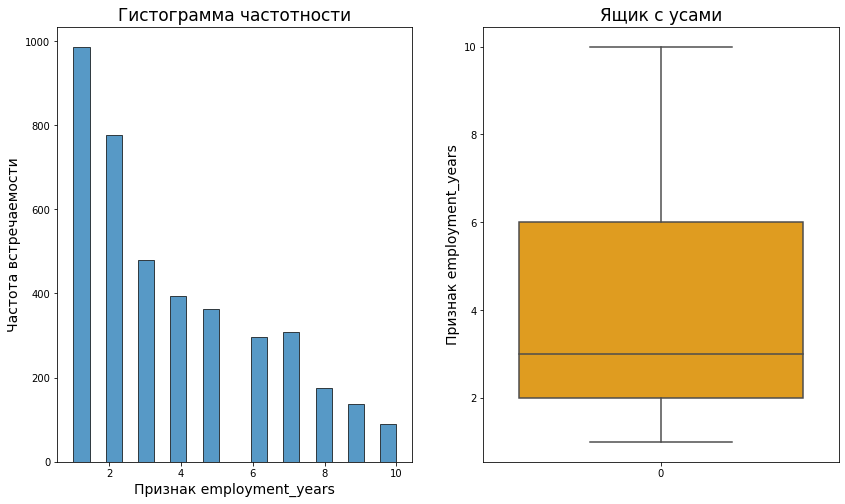


Статистические характеристики признака supervisor_evaluation


count    4000.000000
mean        3.474750
std         1.004049
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64

Мода признака supervisor_evaluation: 4



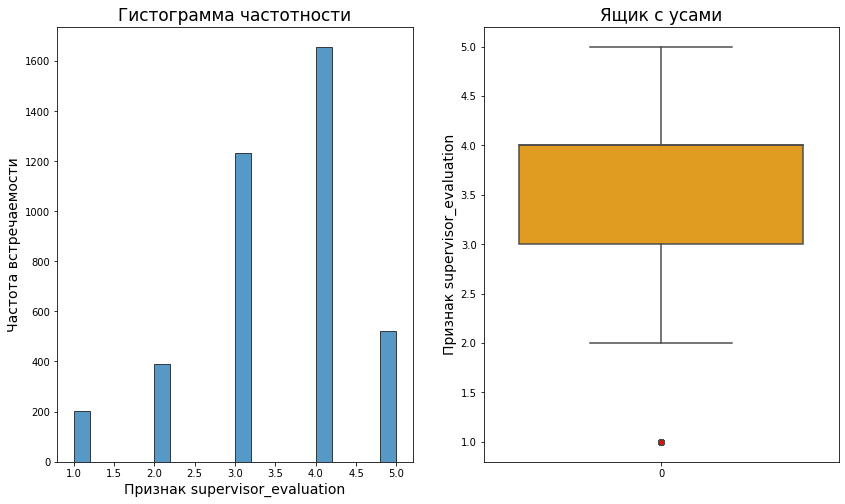


Статистические характеристики признака salary


count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

Мода признака salary: 24000



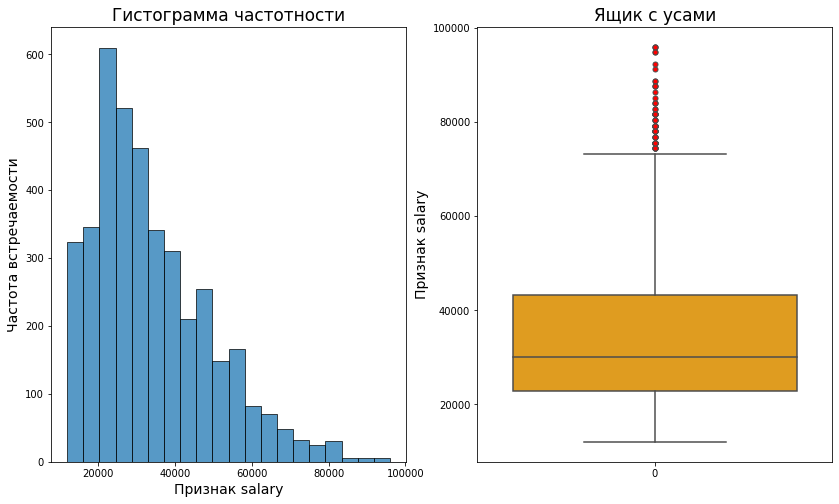

In [28]:
#Вызовем функцию для построения графиков:
graph_num(df_train_target_quit, 20)

> Данные сильно схожи с теми, которые мы исследовали в ***df_train***

> Выбросы имеются, но они лежат в допутсимом диапозоне

> Аномальных знаечний - нет

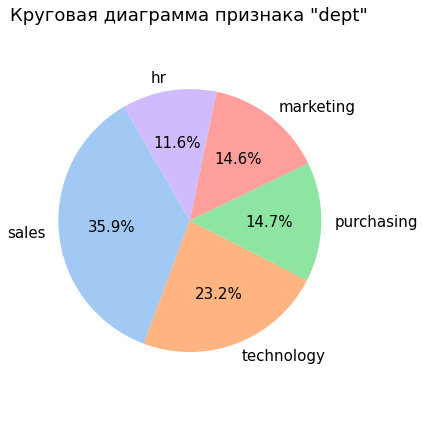

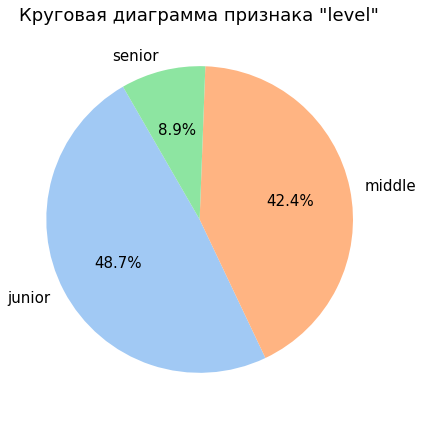

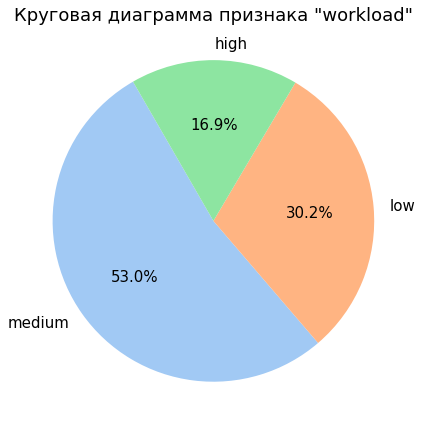

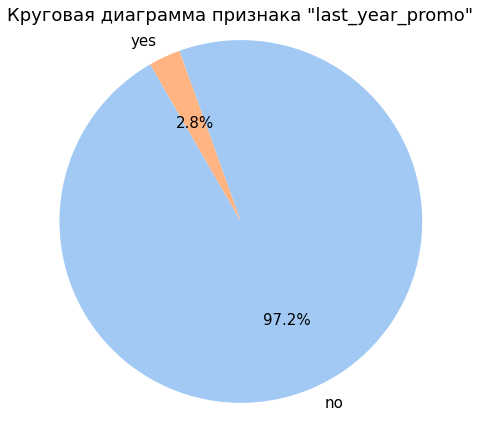

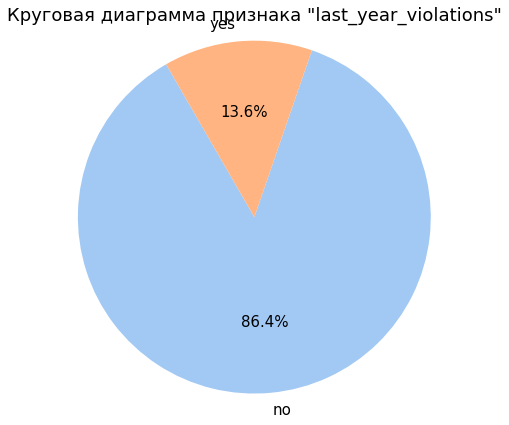

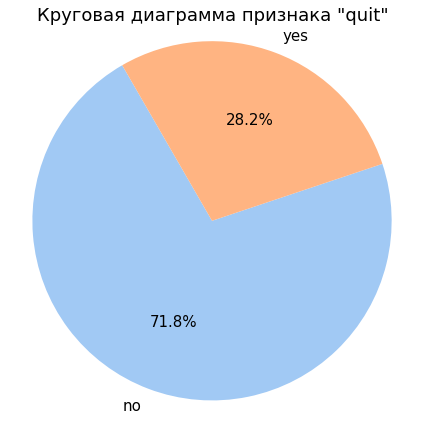

In [29]:
#Вызываем функцию:
graph_cat(df_train_target_quit)

Также сразу просмотрим значения в дф ***df_test_target_quit*** (одно категориальное значение)

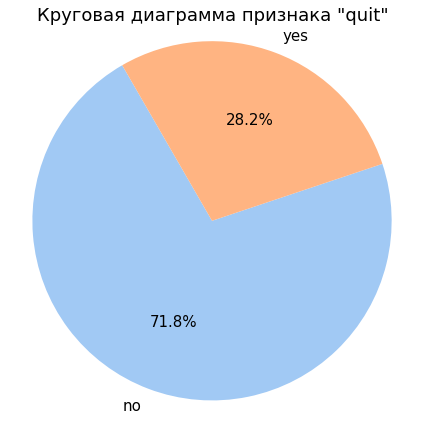

In [30]:
#Вызываем функцию:
graph_cat(df_test_target_quit)

#### Портрет уволившегося сотрудника

Выделим сотрудников которые уволились (по данным тренеровочной выборки), и сгруппируем их по отделам в зависимости от уровня загруженности:

In [31]:
#Делаем срез по сотрудникам, которые уволились:
quit_df = df_train_target_quit.query('quit=="yes"')

#Группируем их по отделу и уровню загруженности:
quit_df.groupby(['dept','workload'])['workload'].agg(['count'])

count
dept       workload       
hr         high          7
           low          65
           medium       44
marketing  high         20
           low          71
           medium       72
purchasing high         21
           low          75
           medium       70
sales      high         43
           low         187
           medium      177
technology high         30
           low         121
           medium      125

Построим столбчатую диаграмму по которой определим отделы из которых уходит больше всего сотрудников в зависимости от уровня загруженности:

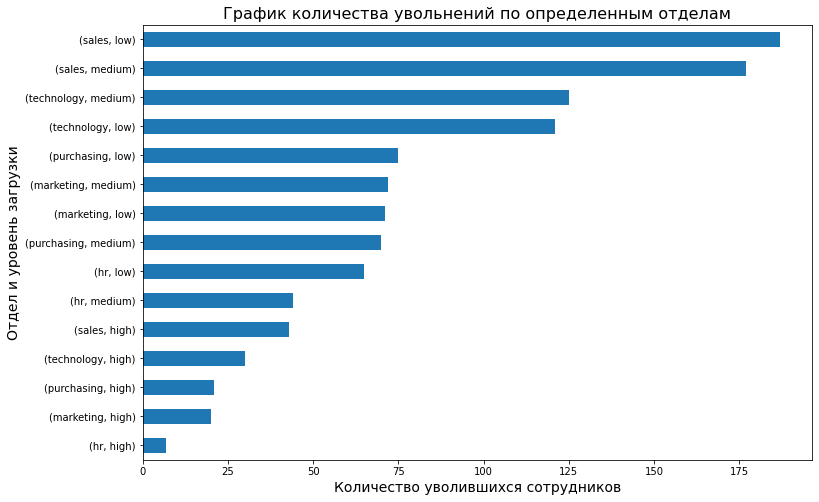

In [32]:
quit_df.groupby(['dept','workload'])['workload'].agg(['count']).sort_values(by='count',
                                                                            ascending=True).plot(kind='barh', 
                                                                                                 figsize=(12,8), legend=False)
plt.xlabel('Количество уволившихся сотрудников', fontsize=14)
plt.ylabel('Отдел и уровень загрузки', fontsize=14)
plt.title('График количества увольнений по определенным отделам', fontsize=16)
plt.show()

> По количеству увольнений ледируют отделы **продаж** и **технологический**, с **средним и низким уровнем загруженности**

Можно найти долю уволившихся из определенного отдела от общего числа сотрудников, исходя из уровня загруженности: 

1. Нужно выделить всех уволенных клиентов по отделам (сделано - query_df)

2. Взять общее число клиентов сгруппированных по отделам в зависимости от уровня нагрузки

3. Разделить первое на второе и привести к процентам

In [33]:
#Уволившиеся:
d1 = quit_df.groupby(['dept','workload'])['workload'].agg(['count'])

#Все сотрудники:
d2 = df_train_target_quit.groupby(['dept','workload'])['workload'].agg(['count'])

#Доля сотрудников:
percent_quit = (d1/d2)*100

#Вывод доли уволившихся сотрудников:
percent_quit.rename(columns={'count':'percent_quit'})

percent_quit
dept       workload              
hr         high          9.589041
           low          45.454545
           medium       17.741935
marketing  high         18.348624
           low          41.040462
           medium       24.000000
purchasing high         22.826087
           low          43.352601
           medium       21.671827
sales      high         17.131474
           low          43.187067
           medium       23.474801
technology high         20.134228
           low          42.307692
           medium       25.354970

> По полученным данным, наибольший процент уволившихся сотрудников имеет уровень занятости ***low*** по всем отделам

Получается, вне зависимости от отдела, больше всего сотрудников уходят из-за **низкого уровня занятости**. В каждом из отделов работает разное количество сотрудников, процентое соотношение более точно иллюстрирует отток из каждого отдела.

Теперь сравним среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании:

In [34]:
#Средние зарплаты тех, кто уволился:
quit_df = quit_df.groupby(['dept','workload'])['salary'].agg(['mean'])

#Переменуем столбцец:
quit_df = quit_df.rename(columns={'mean': 'mean_salary_quit'})

#Выделим срез оставшихся сотрудников:
no_quit_df = df_train_target_quit.query('quit=="no"')

#Средние зарплаты тех, кто остался:
no_quit_df = no_quit_df.groupby(['dept','workload'])['salary'].agg(['mean'])

#Переменуем столбцец:
no_quit_df = no_quit_df.rename(columns={'mean': 'Ср.зарплата оставшихся'})

#Добавим в одну таблицу значения средних зарплат другой:
no_quit_df['Ср.зарплата уволившихся'] = quit_df['mean_salary_quit']

#Выведем итоговую сгруппированную таблицу:
no_quit_df

Ср.зарплата оставшихся  Ср.зарплата уволившихся
dept       workload                                                 
hr         high                58654.545455             41485.714286
           low                 23461.538462             17815.384615
           medium              35723.529412             26454.545455
marketing  high                61092.134831             38580.000000
           low                 23670.588235             16749.295775
           medium              37531.578947             27233.333333
purchasing high                58073.239437             38000.000000
           low                 21685.714286             16592.000000
           medium              35084.584980             26262.857143
sales      high                54271.153846             38483.720930
           low                 22160.975610             15612.834225
           medium              34024.263432             24359.322034
technology high                66423.529412             44760.000000
           low                 26407.272727             20290.909091
           medium              41100.000000             30748.800000

Визуализируем полученный результат:

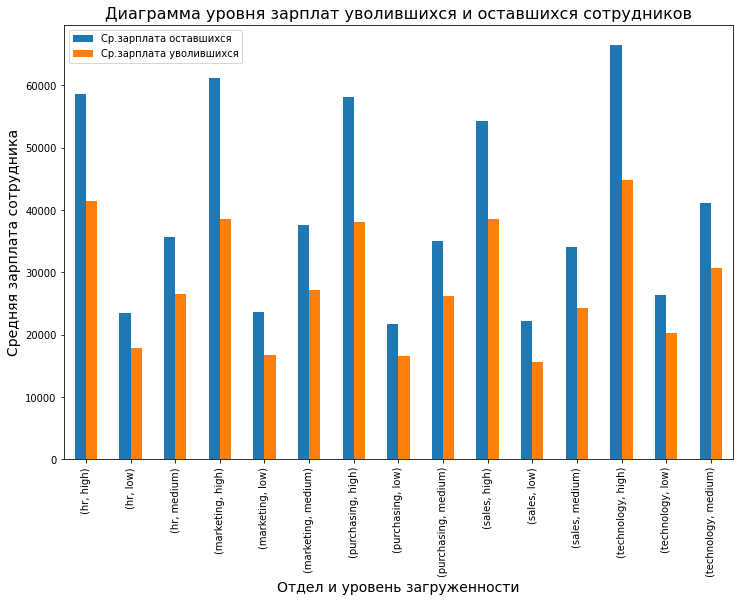

In [35]:
no_quit_df.plot(kind='bar', figsize=(12,8))
plt.xlabel('Отдел и уровень загруженности', fontsize=14)
plt.ylabel('Средняя зарплата сотрудника', fontsize=14)
plt.title('Диаграмма уровня зарплат уволившихся и оставшихся сотрудников', fontsize=16)
plt.show()

Подводим итоги портрета уволившегося сотрудника:

> Данный сотрудник может работать в любом отделе

> Чем ниже уровень занятости - тем больше вероятность его увольнения

> Ср.уровень зарплаты у сотрудника, которых уволился - ниже, чем у того, кто остался

#### Проверка влияния уровня удовлетворенности сотрудника на уход

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. 

Проверим это утверждение: визуализируем и сравним распределения признака ***job_satisfaction_rate*** для ушедших и оставшихся сотрудников. Используем данные с обоими целевыми признаками тестовой выборки

In [36]:
#Отсортируем таблиццы по id:
df_test_target = df_test_target.sort_values(by='id')

df_test_target_quit = df_test_target_quit.sort_values(by='id')

#Создадим новуб таблицу путем объединения двух:
df_target = pd.merge(df_test_target, df_test_target_quit, on='id')

#Выведем таблицу:
df_target

,id,job_satisfaction_rate,quit
0,100298,0.80,no
1,100480,0.84,no
2,100503,0.79,no
3,100610,0.75,no
4,100692,0.69,no
...,...,...,...
1995,997290,0.79,no
1996,998548,0.76,yes
1997,998762,0.48,yes
1998,998900,0.57,no


In [37]:
#Сделаем два среза по данным ушедших и оставшихся сотрудников:

#Уволившиеся:
df_target_quit = df_target.query('quit=="yes"')

#Оставшиеся:
df_target_no_quit = df_target.query('quit=="no"')

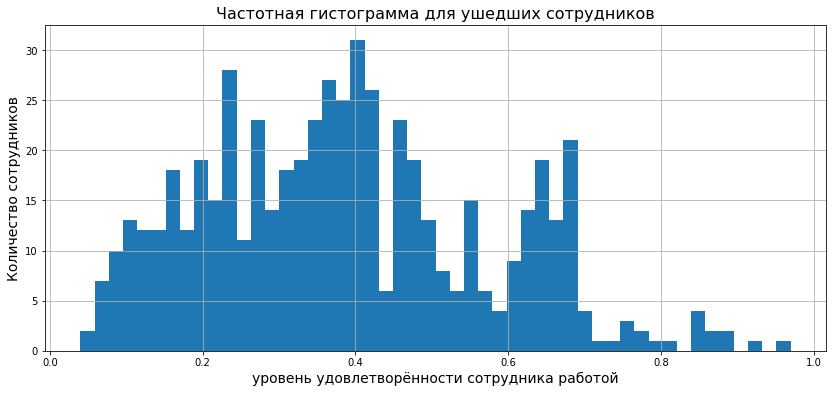

In [38]:
#Визуализируем распределиние первого среза:
df_target_quit.hist('job_satisfaction_rate', figsize=(14,6), bins=50)
plt.title('Частотная гистограмма для ушедших сотрудников', fontsize=16)
plt.xlabel('уровень удовлетворённости сотрудника работой', fontsize=14)
plt.ylabel('Количество сотрудников', fontsize=14)
plt.show()

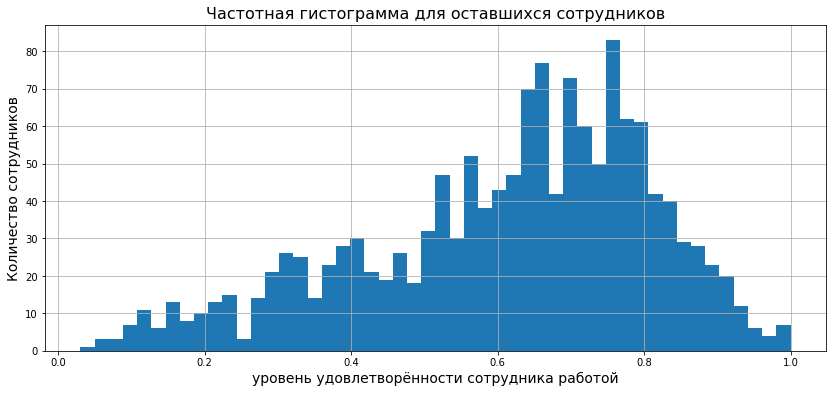

In [39]:
#Визуализируем распределиние второго среза:
df_target_no_quit.hist('job_satisfaction_rate', figsize=(14,6), bins=50)
plt.title('Частотная гистограмма для оставшихся сотрудников', fontsize=16)
plt.xlabel('уровень удовлетворённости сотрудника работой', fontsize=14)
plt.ylabel('Количество сотрудников', fontsize=14)
plt.show()

По распределениям на гистограммах частотности можно можно сделать определенные выводы:

> Основная масса сотрудников, которые уволняются действительно имеют **уровень удовлетворенности ниже 0.5**

> Также есть всплеск увольнений сотрудников на интервале уровня удолетворенности от 0.6 до 0.7

> Сотрудники с уровнем удовлетворенности выше 0.7 - **почти не увольняются** (редкие случаи)

> Рассматривая частотную гистограмму оставшихся сотрудников можно сделать очевидный вывод, что люди имеющие хороший уровень удовлетворенности остаются работать дальше

Исходя из выше сказанного, можно согласиться с утверждением аналитиков о том, что есть взаимосвязь между уровнем удовлетворенности и уходом сотрудника из компании

<a id='section_10'></a>

### Добавление нового входного признака

Мы установили, что есть взаимосвязь между признаками ***job_satisfaction_rate*** и ***quit***. Добавим предсказанные значения ***job_satisfaction_rate*** первой модели к входным признакам для второй:

In [40]:
#Предсказанные значения job_satisfaction_rate для тренеровочной выборки:
pd.Series(randomized_search.predict(X_train))

0       0.495000
1       0.767143
2       0.158333
3       0.341250
4       0.174545
          ...   
3995    0.460000
3996    0.675455
3997    0.813750
3998    0.516667
3999    0.232500
Length: 4000, dtype: float64

In [41]:
#Предсказанные значения job_satisfaction_rate для тестовой выборки:
pd.Series(randomized_search.predict(X_test))

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0       0.850000
1       0.832857
2       0.690000
3       0.805714
4       0.701818
          ...   
1995    0.818333
1996    0.843333
1997    0.476250
1998    0.475455
1999    0.307143
Length: 2000, dtype: float64

In [42]:
#Отсортируем значения:
df_train_target_quit.sort_values(by='id')

#Добавим новый входной признак к тренеровочной выборке:
df_train_target_quit['job_satisfaction_rate'] = pd.Series(randomized_search.predict(X_train))

#Посмотрим на результат:
df_train_target_quit.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.495000
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.767143
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.158333
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.341250
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.174545
5,699916,sales,junior,low,1,no,yes,3,18000,yes,0.825000
6,417070,technology,middle,medium,8,no,no,2,44400,no,0.556250
7,165489,sales,middle,low,4,no,no,5,19200,no,0.504286
8,996399,marketing,middle,low,7,no,no,4,25200,no,0.245455
9,613206,technology,middle,medium,2,no,no,3,45600,yes,0.484545


In [43]:
#Отсортируем значения:
df_test_features.sort_values(by='id')

#Добавим новый входной признак к тренеровочной выборке и столбец целевого признака quit:
df_test_features = pd.merge(df_test_features, df_test_target_quit, on='id')

df_test_features['job_satisfaction_rate'] = pd.Series(randomized_search.predict(X_test))

#Посмотрим на результат:
df_test_features.head(10)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,100298,hr,junior,low,2,no,no,4,19200,no,0.850000
1,100480,marketing,junior,low,4,no,no,4,16800,no,0.832857
2,100503,purchasing,middle,high,5,no,no,4,55200,no,0.690000
3,100610,sales,middle,medium,5,no,no,4,43200,no,0.805714
4,100692,sales,middle,high,6,no,no,4,48000,no,0.701818
5,100710,hr,senior,low,6,no,no,4,27600,no,0.684545
6,100894,sales,middle,high,6,no,no,3,56400,no,0.506000
7,102102,marketing,junior,medium,3,no,no,4,25200,no,0.782727
8,102222,marketing,middle,medium,8,no,no,4,36000,no,0.677273
9,102320,sales,middle,high,4,no,no,3,57600,no,0.244000


Итак, мы сформировали две выборки, тренеровочную и тестовую для работы с второй моделью

<a id='section_11'></a>

### Подготовка данных

In [44]:
#Создадим списпики для кодирования и масштабирования:

#Список для кодирования с помощью OneHotEncoder:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']

#Список для кодирования с помощью OrdinalEncoder:
ord_columns = ['level', 'workload']

#Список для кодирования количественных перменных:
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

#Создадим паплайн предподготовки данных:

#SimpleImputer + OHE:
ohe_pipe = Pipeline(
    [
        (
            'replace_empty', 
            replace_empty_strings
        ),
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False)
        )
    ]
 )

#Cоздаём пайплайн для подготовки признаков из списка ord_columns:
#SimpleImputer + Ord + SimpleImputer:
ord_pipe = Pipeline(
    [
        (
            'replace_empty', 
            replace_empty_strings
        ),
        (
            'simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  OrdinalEncoder(categories=[['junior', 'middle', 'senior'], 
                                               ['low', 'medium', 'high']], 
                                   handle_unknown='use_encoded_value', unknown_value=np.nan)
        ),
        (
            'simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

#Создаем общий пайплайн для подготовки данных:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)    
    ], 
    remainder =  'passthrough'
)

data_preprocessor

#Создаем финальный пайплайн, в котором будем перебирать методы масштабирования и различные модели:

pipe_final_model_2 = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LogisticRegression())
    ]
)

#Вызовем финальный пайплайн и посмотрим что получилось:
pipe_final_model_2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('replace_empty',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fa5c0a95b80>)),
                                                                  ('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_vio...
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'senior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary',
                                                   'job_satisfaction_rate'])])),
                ('models', LogisticRegression())])

<a id='section_12'></a>

### Обучение моделей

In [45]:
#Отделим входные и целевой признаки в тренеровочной и тестовой выборках:
X_train = df_train_target_quit.drop(['id', 'quit'], axis=1)
y_train = df_train_target_quit['quit']

X_test = df_test_features.drop(['id', 'quit'], axis=1)
y_test = df_test_features['quit']

#### Модель Логистической регрессии

In [46]:
#Перебор методов масштабирования и гиперпараметров: 
param_distributions = [  
    {'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
     'models__C': range(1,200),     
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}]

#Поиск гиперпараметров:
    
randomized_search = RandomizedSearchCV(
    pipe_final_model_2, 
    param_distributions=param_distributions, 
    cv=5,
    random_state=RANDOM_STATE,
    scoring='roc_auc',
    n_jobs=-1
)

#Обучаем модель:
randomized_search.fit(X_train, y_train)

#Выводим лучшую метрику модели:
print('Метрика ROC-AUC для лучшей модели:\n', randomized_search.best_score_)

#Выводим параметры лучшей модели:
randomized_search.best_params_

Метрика ROC-AUC для лучшей модели:
 0.9107414134177398


{'preprocessor__num': 'passthrough',
 'models__C': 26,
 'models': LogisticRegression(penalty='l1', random_state=42, solver='liblinear')}

#### Модель kNN

In [47]:
#Перебор методов масштабирования и гиперпараметров: 
param_distributions = [  
    {'models': [KNeighborsClassifier()],
     'models__n_neighbors': range(2,20),     
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}]

#Поиск гиперпараметров:
    
randomized_search = RandomizedSearchCV(
    pipe_final_model_2, 
    param_distributions=param_distributions, 
    cv=5,
    random_state=RANDOM_STATE,
    scoring='roc_auc',
    n_jobs=-1
)

#Обучаем модель:
randomized_search.fit(X_train, y_train)

#Выводим лучшую метрику модели:
print('Метрика ROC-AUC для лучшей модели:\n', randomized_search.best_score_)

#Выводим параметры лучшей модели:
randomized_search.best_params_

Метрика ROC-AUC для лучшей модели:
 0.9138651949251753


{'preprocessor__num': StandardScaler(),
 'models__n_neighbors': 18,
 'models': KNeighborsClassifier()}

#### Модель дерева решений

In [48]:
#Перебор методов масштабирования и гиперпараметров: 
param_distributions = [  
    {'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
     'models__max_depth': range(1,20),
     'models__min_samples_split': range(2,20),
     'models__min_samples_leaf': range(2,20),     
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}]

#Поиск гиперпараметров:
    
randomized_search = RandomizedSearchCV(
    pipe_final_model_2, 
    param_distributions=param_distributions, 
    cv=5,
    random_state=RANDOM_STATE,
    scoring='roc_auc',
    n_jobs=-1
)

#Обучаем модель:
randomized_search.fit(X_train, y_train)

#Выводим лучшую метрику модели:
print('Метрика ROC-AUC для лучшей модели:\n', randomized_search.best_score_)

#Выводим параметры лучшей модели:
randomized_search.best_params_

Метрика ROC-AUC для лучшей модели:
 0.9267671354165969


{'preprocessor__num': 'passthrough',
 'models__min_samples_split': 3,
 'models__min_samples_leaf': 17,
 'models__max_depth': 15,
 'models': DecisionTreeClassifier(random_state=42)}

In [49]:
probabilities_one = randomized_search.best_estimator_.predict_proba(X_test)[:, 1]

print('Метрика ROC-AUC лучшей модели на тестовых данных:', roc_auc_score(y_test, probabilities_one))

Метрика ROC-AUC лучшей модели на тестовых данных: 0.9191428860704478


Итак, для оценки качества работы модели мы использовали метрику ***ROC-AUC***

Лучшая метрика по результатам кросс-валидации оказалась у модели **Дерева классификаций** и равна **0.9267**, теперь требуется взять метрику ***ROC-AUC*** на тестовых данных лучшей модели. Данная метрика получилась **0.9191**

- Критерий успеха:

$$ROC-AUC ≥ 0.91$$


Под данный результат подходит наша модель - **Дерево решений**, значение метрики ***ROC-AUC*** на тестовых данных которой получилось **0.9191**

**Гиперпарметры модели** данной модели:

> **Количество образцов в узле** - **3** | **Количество листьев** - **17** | **Количество уровней (глубина)** - **15**

<a id='section_13'></a>

### Вывод к задаче №2

По результатам метрики ***ROC-AUC*** вторая модель справилась лучше, попробуем разобраться почему:

---

1. **Деревья решений** хорошо справляются **с нелинейными зависимостями** в данных, по сравнению с **Логистической регрессией**


2. Также дерево решений лучше обрабатывает **данные с выбросами**, как в нашем случае


3. **kNN** - метод, основанный на расстоянии между точками, может иметь ограничения при обработке сложных нелинейных взаимосвязей

---

Исходя из этих утверждений, можно сказать, что модель **Дерева решений** отработала лучше, поскольку зависимость между некторыми данными - **нелинейная**, а также имеются **выбросы**

<a id='section_14'></a>

### Общий вывод

Компания предоставила данные с характеристиками сотрудников компании. Среди них — **уровень удовлетворённости сотрудника** работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1:

>  **0** — **совершенно неудовлетворён**

>  **1** — **полностью удовлетворён**

Нам поставили задачу создать модель, которая бы предсказывала уровень удовлетворенности сотрудника на основе данных заказчика. А также на основе тех же данных создать еще одну модель, которая прогнозирует уход сотрудника из компании.

---

**Основные этапы работы:**

Сначала мы получили данные в виде ***csv*** - файлов. Мы выполнили предобработку этих данных и провели их исследовательский анализ. Выяснили, что предоставленные данные **корректны**. В данных имелись пропуска, их обработкой мы занялись на этапе создания пайпланов. 

Для создания модели, которая могла бы предсказывать уровень удовлетворенности сотрудника мы использовали модели **Дерева регрессии** и **Линейную регрессию**. Использование этих моделей было связано с тем, что **целевой признак - непрерывная количественная переменная**, исходя из этого было принято решение использовать эти модели. По результатам моделирования нам удалось предсказать уровень удовлетворенности сотрудника по входным данным. 

Оценка моделей производилась по средствам собственной метрики ***SMAPE*** (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). Данная метрика показала, что лучшей моделью из использованных является **Дерево регрессий** с гиперпараметрами:

> **Количество образцов в узле** - **11** | **Количество листьев** - **6** | **Количество уровней (глубина)** - **17**

На этапе решения второй задачи, был предоставлен новый целевой признак, которых хранил информацию о состоянии сторудника на данный момент: **уволился - да/нет**. Исходя из этих данных мы сегментировали клиентов по их состоянию и вывели портрет пользователя который обьычно уволняется. Как выяснилось, в долевом соотношение большенство сотрудников, которые увольняются - имеют **низкий уровень загруженности** вне зависимости отдела компании, в котором они работают. Также мы сравнили средний уровень зарплат у сотрудников которые уволились и остались, оказалось, что средний уровень зарплат выше у втоорого сегмента.

По мере исследования данных было замечено, что уровень удовлетворенности работы зависит от целевого признака ушел ли сотрудник или остался. Как выяснилось, с увеличением удовлетворенности работой большое количество сотрудников - остается, и наоборот с уменьшением уровня удовлетвренности - сотрудники увольняютя, что естественно. Данную взаимосвязь мы решили учесть при создании моделей для решения второй задачи.

Для прогнозирования оттока сотрудников мы использовали теже входные признаки, но также добавли уровень удовлетвренности сотрудника, предсказанный с помощью предыдущей модели. В качестве моделей были выбраны **Логистическая регрессия, Дерево классификаций и метод ближайших соседей**. Из трех моделей лучше всего показала себя **Дерево классификаций** - которая имела самую высокую метрику ***ROC-AUC*** на тестовых данных. Эта модель имела гиперпараметры: 

> **Количество образцов в узле** - **3** | **Количество листьев** - **17** | **Количество уровней (глубина)** - **15**

---

По результатам моделированния и исследований можно дать некоторые рекомендации:

- Слишком маленький процент повышений за год, который составляет порядка 3%, следует пересмотреть систему повышений

- Ушедшие сотрудники работая в тех же отделах с таким же уровнем загруженности в среднем имели заработную плату ниже, нежели те, кто остались, возможно следовало бы уравнивать уровень доходов между всеми сотрудниками

- Большой отток сотрудников наблюдается в отделах с низкой загруженностью, возможно люди сидят без дела, что дает им время анализировать и искать варианты перспективнее